fichero original:

https://datosabiertos.malaga.eu/recursos/ambiente/calidadaire/2018.json

In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
    
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
calidad_aire = pd.read_csv("calidad_aire_2018.csv") 
    
# Preview the first 5 lines of the loaded data 
calidad_aire.head()
list(calidad_aire)

# Remove repeated/useless columns 
calidad_aire = calidad_aire.drop(calidad_aire.columns[[0,1,2,3,4,5,6,7,8,11,18]], axis=1)
calidad_aire.head()

,geometry/coordinates/0/4/0,geometry/coordinates/0/4/1,properties/co_F_level,properties/pm1_F_level,properties/pm1_level,properties/no2_F,properties/no2,properties/co_level,properties/pm1_F,properties/co,...,properties/pm10_APP_level,properties/pm10_M,properties/iuca.level_M_global,properties/o3_M,properties/pm25_M,properties/count_M,properties/pm10_M_level,properties/pm1_M_level,properties/co_M,properties/co_APP_level
0,-4.439850,36.698456,good,unhealthy-low,unhealthy-low,16.0,16.0,good,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.428864,36.709442,good,unhealthy-low,unhealthy-low,55.0,55.0,good,6.0,99.0,...,good,14.0,moderate,0.0,11.0,30.0,good,unhealthy-low,64.0,unhealthy-high
2,-4.340973,36.717682,good,moderate,moderate,24.0,24.0,good,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-4.424744,36.734161,good,unhealthy-high,unhealthy-high,21.0,21.0,good,18.0,721.0,...,good,14.0,moderate,1.0,12.0,710.0,good,unhealthy-low,60.0,good
4,-4.496155,36.701202,good,NaN,unhealthy-high,14.0,14.0,good,15.0,172.0,...,good,15.0,moderate,6.0,13.0,213.0,NaN,unhealthy-low,149.0,unhealthy-low


In [2]:
list(calidad_aire)[2:]

['properties/co_F_level',
 'properties/pm1_F_level',
 'properties/pm1_level',
 'properties/no2_F',
 'properties/no2',
 'properties/co_level',
 'properties/pm1_F',
 'properties/co',
 'properties/o3_F',
 'properties/count_SMAQ',
 'properties/o3_level',
 'properties/pm25',
 'properties/pm1',
 'properties/pm10_F_level',
 'properties/iuca.level_F_global',
 'properties/pm25_F_level',
 'properties/count_F',
 'properties/pm25_F',
 'properties/no2_F_level',
 'properties/count',
 'properties/iuca.level_global',
 'properties/pm10_level',
 'properties/co_F',
 'properties/pm10',
 'properties/o3',
 'properties/pm10_F',
 'properties/o3_F_level',
 'properties/no2_level',
 'properties/pm25_level',
 'properties/no2_M_level',
 'properties/resp_APP_level',
 'properties/iuca.level_APP_global',
 'properties/no2_M',
 'properties/pm25_M_level',
 'properties/o3_M_level',
 'properties/co_M_level',
 'properties/pm1_M',
 'properties/count_APP',
 'properties/iaq_APP_level',
 'properties/pm10_APP_level',
 'properti

In [3]:
droplist = calidad_aire.dtypes != object
droplist[0:2] = False
droplist

geometry/coordinates/0/4/0          False
geometry/coordinates/0/4/1          False
properties/co_F_level               False
properties/pm1_F_level              False
properties/pm1_level                False
properties/no2_F                     True
properties/no2                       True
properties/co_level                 False
properties/pm1_F                     True
properties/co                        True
properties/o3_F                      True
properties/count_SMAQ                True
properties/o3_level                 False
properties/pm25                      True
properties/pm1                       True
properties/pm10_F_level             False
properties/iuca.level_F_global      False
properties/pm25_F_level             False
properties/count_F                   True
properties/pm25_F                    True
properties/no2_F_level              False
properties/count                     True
properties/iuca.level_global        False
properties/pm10_level             

In [4]:
calidad_aire_num = calidad_aire.drop(calidad_aire.columns[calidad_aire.dtypes == object], axis=1)
calidad_aire_num.head()

,geometry/coordinates/0/4/0,geometry/coordinates/0/4/1,properties/no2_F,properties/no2,properties/pm1_F,properties/co,properties/o3_F,properties/count_SMAQ,properties/pm25,properties/pm1,...,properties/o3,properties/pm10_F,properties/no2_M,properties/pm1_M,properties/count_APP,properties/pm10_M,properties/o3_M,properties/pm25_M,properties/count_M,properties/co_M
0,-4.439850,36.698456,16.0,16.0,6.0,7.0,10.0,251521.0,10.0,6.0,...,10.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.428864,36.709442,55.0,55.0,6.0,99.0,5.0,248629.0,9.0,6.0,...,5.0,21.0,8.0,6.0,3.0,14.0,0.0,11.0,30.0,64.0
2,-4.340973,36.717682,24.0,24.0,3.0,2.0,12.0,242008.0,5.0,3.0,...,12.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-4.424744,36.734161,21.0,21.0,18.0,721.0,7.0,37305.0,148.0,18.0,...,6.0,31.0,7.0,7.0,106.0,14.0,1.0,12.0,710.0,60.0
4,-4.496155,36.701202,14.0,14.0,15.0,172.0,3.0,33589.0,22.0,15.0,...,3.0,25.0,0.0,9.0,369.0,15.0,6.0,13.0,213.0,149.0


In [5]:
droplist = calidad_aire.dtypes != object
droplist[0:2] = False
droplist

calidad_aire_obj = calidad_aire.drop(calidad_aire.columns[droplist], axis=1)
calidad_aire_obj.head()

,geometry/coordinates/0/4/0,geometry/coordinates/0/4/1,properties/co_F_level,properties/pm1_F_level,properties/pm1_level,properties/co_level,properties/o3_level,properties/pm10_F_level,properties/iuca.level_F_global,properties/pm25_F_level,...,properties/iuca.level_APP_global,properties/pm25_M_level,properties/o3_M_level,properties/co_M_level,properties/iaq_APP_level,properties/pm10_APP_level,properties/iuca.level_M_global,properties/pm10_M_level,properties/pm1_M_level,properties/co_APP_level
0,-4.439850,36.698456,good,unhealthy-low,unhealthy-low,good,good,moderate,moderate,moderate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.428864,36.709442,good,unhealthy-low,unhealthy-low,good,good,moderate,moderate,good,...,unhealthy-high,moderate,good,good,good,good,moderate,good,unhealthy-low,unhealthy-high
2,-4.340973,36.717682,good,moderate,moderate,good,good,moderate,moderate,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-4.424744,36.734161,good,unhealthy-high,unhealthy-high,good,good,unhealthy-low,unhealthy-high,unhealthy-high,...,unhealthy,moderate,good,good,good,good,moderate,good,unhealthy-low,good
4,-4.496155,36.701202,good,NaN,unhealthy-high,good,good,moderate,unhealthy-low,unhealthy-low,...,unhealthy-low,moderate,good,good,unhealthy-low,good,moderate,NaN,unhealthy-low,unhealthy-low


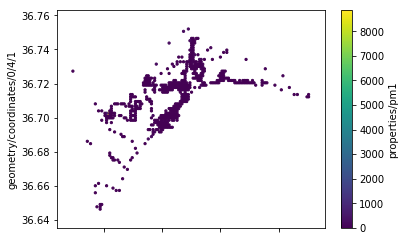

In [6]:
# Pinto una variable numerica: BIEN

calidad_aire_num.plot.scatter(x = 'geometry/coordinates/0/4/0', 
            y = 'geometry/coordinates/0/4/1', 
            c = 'properties/pm1',
            colormap='viridis',
            s = 5)

In [7]:
all_z_variables = list(calidad_aire)[3:]
print(all_z_variables)

['properties/pm1_F_level', 'properties/pm1_level', 'properties/no2_F', 'properties/no2', 'properties/co_level', 'properties/pm1_F', 'properties/co', 'properties/o3_F', 'properties/count_SMAQ', 'properties/o3_level', 'properties/pm25', 'properties/pm1', 'properties/pm10_F_level', 'properties/iuca.level_F_global', 'properties/pm25_F_level', 'properties/count_F', 'properties/pm25_F', 'properties/no2_F_level', 'properties/count', 'properties/iuca.level_global', 'properties/pm10_level', 'properties/co_F', 'properties/pm10', 'properties/o3', 'properties/pm10_F', 'properties/o3_F_level', 'properties/no2_level', 'properties/pm25_level', 'properties/no2_M_level', 'properties/resp_APP_level', 'properties/iuca.level_APP_global', 'properties/no2_M', 'properties/pm25_M_level', 'properties/o3_M_level', 'properties/co_M_level', 'properties/pm1_M', 'properties/count_APP', 'properties/iaq_APP_level', 'properties/pm10_APP_level', 'properties/pm10_M', 'properties/iuca.level_M_global', 'properties/o3_M', 

properties/o3_F
properties/count_SMAQ
properties/pm25
properties/pm1
properties/count_F
properties/pm25_F
properties/count
properties/co_F
properties/pm10
properties/o3
properties/pm10_F
properties/no2_M
properties/pm1_M
properties/count_APP
properties/pm10_M
properties/o3_M
properties/pm25_M
properties/count_M
properties/co_M


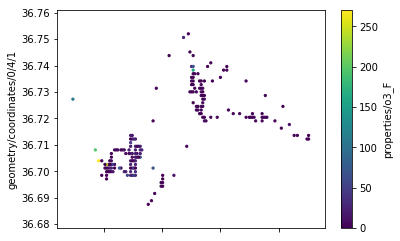

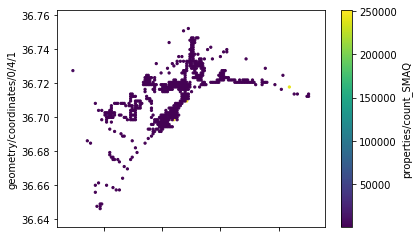

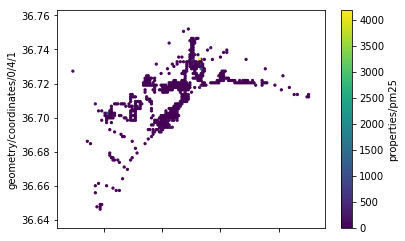

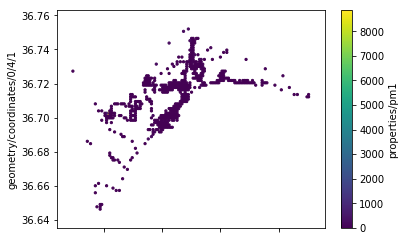

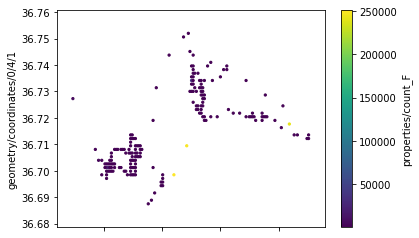

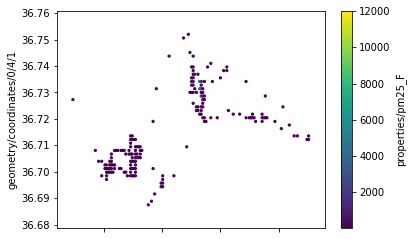

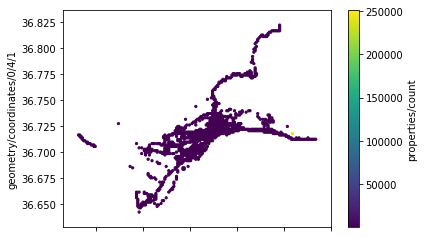

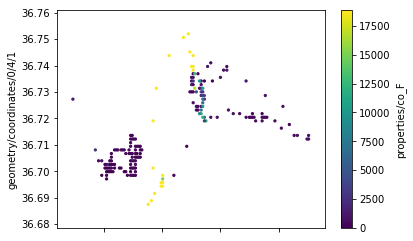

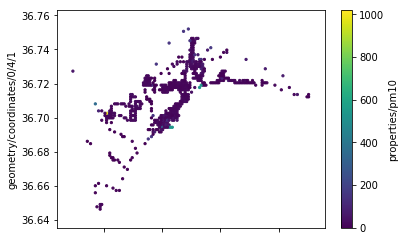

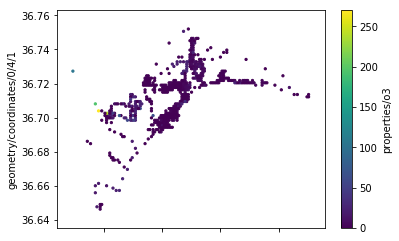

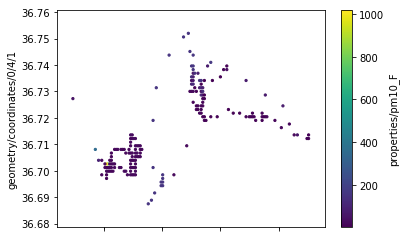

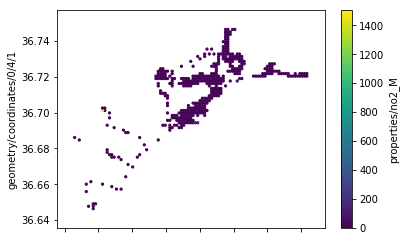

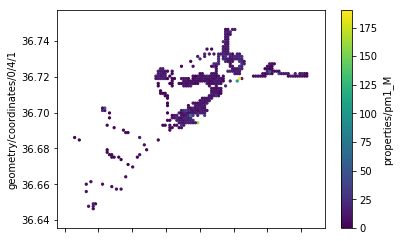

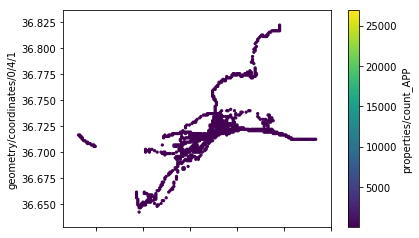

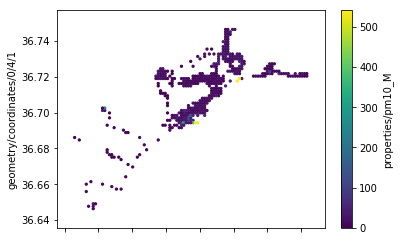

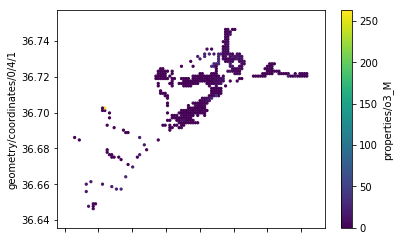

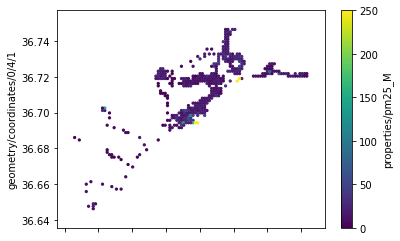

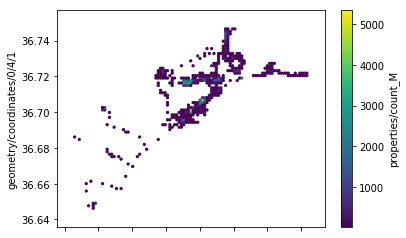

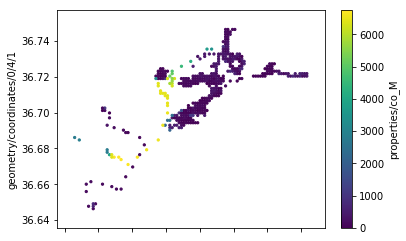

In [8]:
# Intento hacer un loop sobre todas las variables numericas BIEN!

for var in calidad_aire_num.columns[6:]:

    print(var)    
    
    calidad_aire.plot.scatter(x = 'geometry/coordinates/0/4/0', 
            y = 'geometry/coordinates/0/4/1', 
            c = var, #calidad_aire['properties/pm1'], #'properties/pm1',
            colormap='viridis',
            s = 5)

In [10]:
# Lista de colores para mapear con los valores de la variable
color = np.array(['green','olivedrab','darkgoldenrod','orange','red',"purple"])
# Lista de valores de la variable cada una tiene un color
category = np.array(['good', 'moderate', 'unhealthy-low','unhealthy', 'unhealthy-high', 'nan'])
# Diccionario que mapea el valor de la variable como clave y el color como valor de la clave
dictCol = dict(zip(category, color))

# Método al que se le pasa un valor(clave) y obtiene su color asociado
def attribute_color(valor):
    # Si el valor pasado es un nan se detecta como float y se devuelve su color asociado
    if isinstance(valor, float):
        return dictCol.get(str(valor))
    else:
        return dictCol.get(valor)

In [ ]:
#cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap',color, cmap.N)
#norm = mpl.colors.BoundaryNorm(bounds,cmap.N)

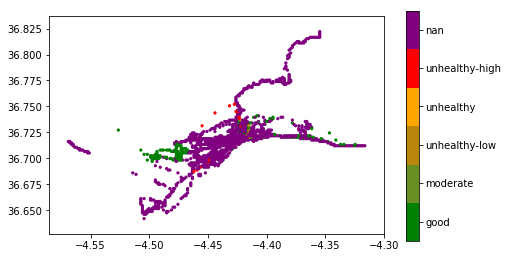

In [11]:
# Intento hacer un loop sobre todas las variables categoricas


#Crea el eje de la barra de color
bounds = np.linspace(0,7,7)
# Mapa de colores
cmap = mpl.colors.ListedColormap(color)
# Variables que contiene el plotteo
fig, ax = plt.subplots()

# Pinto solo la primera variable, no se si las demás tienen los mismos valores discretos.
for var in calidad_aire_obj.columns[2:3]:
    # Cada observación de la variable se le asigna un color respecto a su valor discreto y se crea una lista de colores.
    color_variable = list()
    for i in range(len(calidad_aire_obj[var])):
        color_variable.append(attribute_color(calidad_aire_obj[var][i]))
    # La lista de colores será la que se le pase al scatter plot en el parámetro c.
    ax.scatter(x = calidad_aire['geometry/coordinates/0/4/0'], 
        y = calidad_aire['geometry/coordinates/0/4/1'], 
        c = color_variable,#calidad_aire['properties/pm1'], #'properties/pm1',
        s = 5)
    
    # Situa la barra de color
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    # Crea la barra de color
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
    # Define la posición de los ticks de la barra de color y las etiquetas a usar
    cb.set_ticks(cb.get_ticks()+0.589)
    cb.set_ticklabels(category)
    
    #plt.scatter(x,y, c=colors[z])